# РК-1
## Технологии Машинного Обучения
Угрюмов Михаил Андреевич, ИУ5-64Б, Вариант 19

## Задача №3 (датасет 3)
Для заданного набора данных произведите масштабирование данных (для одного признака) и преобразование категориальных признаков в количественные двумя способами (label encoding, one hot encoding) для одного признака. Какие методы Вы использовали для решения задачи и почему?

Для студентов группы ИУ5-64Б, ИУ5Ц-84Б - для произвольной колонки данных построить график "Скрипичная диаграмма (violin plot)".

### Загрузка датасета

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
%matplotlib inline

data = pd.read_csv('toy_dataset.csv')

In [43]:
# 109120 строк, 6 столбцов
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109120 entries, 0 to 109119
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Number   109120 non-null  int64  
 1   City     109120 non-null  object 
 2   Gender   109120 non-null  object 
 3   Age      109120 non-null  int64  
 4   Income   109120 non-null  float64
 5   Illness  109119 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 5.0+ MB


In [44]:
data.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


### Масштабирование признака `income` (заработок)

Буду использовать StandardScaler - это метод масштабирования признаков, который преобразует данные таким образом, чтобы их распределение имело среднее значение 0 и стандартное отклонение 1.

Преимущества StandardScaler:

- Подходит для данных, которые приблизительно имеют нормальное распределение.
- Не изменяет форму распределения данных, просто масштабирует их.

In [45]:
scaler = StandardScaler()
data['Income_scaled'] = scaler.fit_transform(data[['Income']])

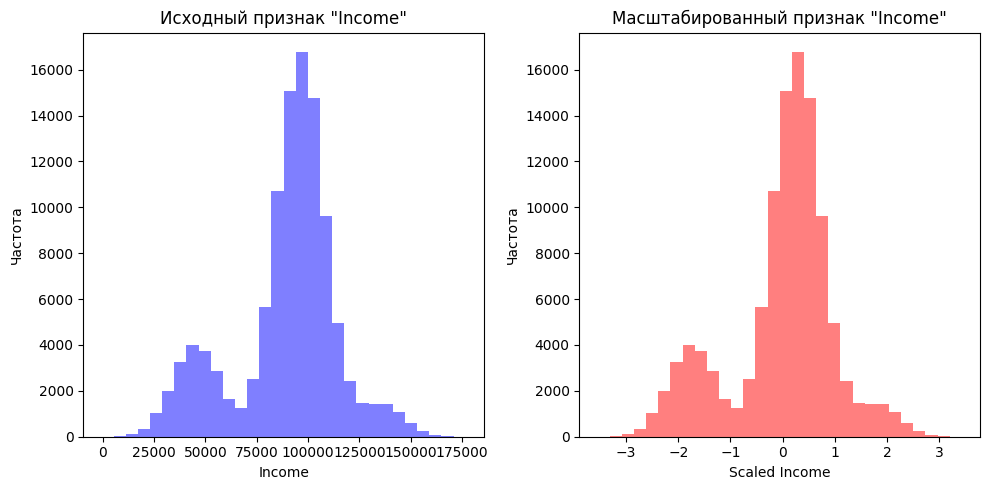

In [46]:
# Гистограмма исходного признака 'Income'
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(data['Income'], bins=30, color='blue', alpha=0.5)
plt.title('Исходный признак "Income"')
plt.xlabel('Income')
plt.ylabel('Частота')

# Гистограмма масштабированного признака 'Income'
plt.subplot(1, 2, 2)
plt.hist(data['Income_scaled'], bins=30, color='red', alpha=0.5)
plt.title('Масштабированный признак "Income"')
plt.xlabel('Scaled Income')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

### Преобразование категориального признака `city` в количественный

In [47]:
# Label Encoding
label_encoder = LabelEncoder()
data['City_label_encoded'] = label_encoder.fit_transform(data['City'])

In [48]:
# One Hot Encoding
one_hot_encoder = OneHotEncoder(sparse=False)
city_encoded = one_hot_encoder.fit_transform(data[['City']])
city_encoded_df = pd.DataFrame(city_encoded, columns=[f'City_{i}' for i in range(city_encoded.shape[1])])
data = pd.concat([data, city_encoded_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


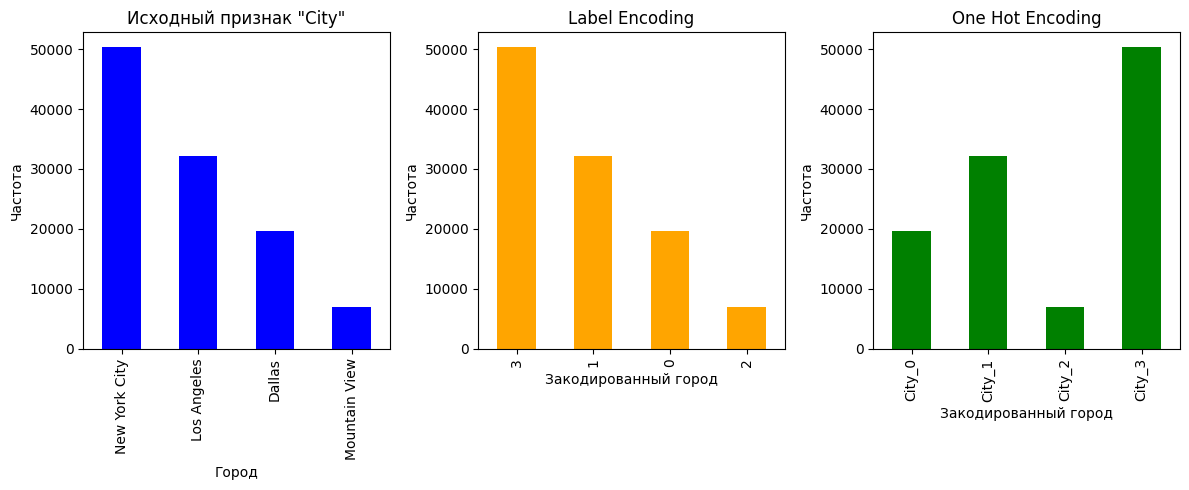

In [49]:
# Гистограмма исходного категориального признака 'City'
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
data['City'].value_counts().plot(kind='bar', color='blue')
plt.title('Исходный признак "City"')
plt.xlabel('Город')
plt.ylabel('Частота')

# Применение LabelEncoder
plt.subplot(1, 3, 2)
label_encoded_counts = data['City_label_encoded'].value_counts()
label_encoded_counts.plot(kind='bar', color='orange')
plt.title('Label Encoding')
plt.xlabel('Закодированный город')
plt.ylabel('Частота')

# Применение OneHotEncoder
plt.subplot(1, 3, 3)
one_hot_encoded_counts = data.iloc[:, -len(label_encoded_counts):].sum()
one_hot_encoded_counts.plot(kind='bar', color='green')
plt.title('One Hot Encoding')
plt.xlabel('Закодированный город')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

### Скрипичная диаграмма по признаку `age`

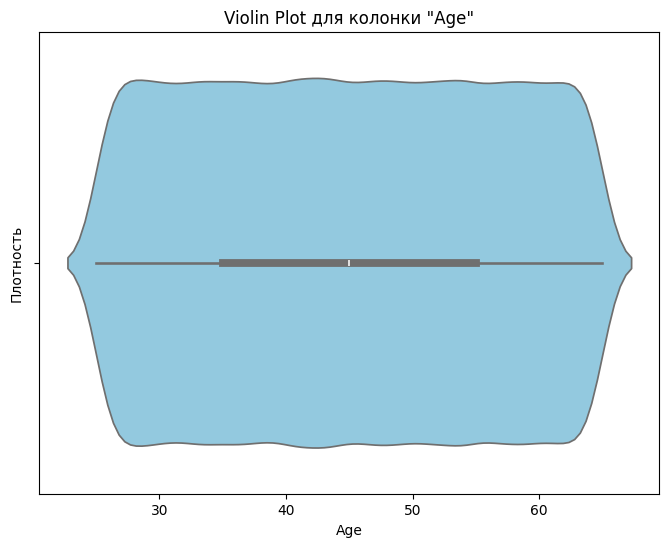

In [52]:
import seaborn as sns

column_name = 'Age'

plt.figure(figsize=(8, 6))
sns.violinplot(x=data[column_name], color='skyblue')
plt.title(f'Violin Plot для колонки "{column_name}"')
plt.xlabel(column_name)
plt.ylabel('Плотность')
plt.show()